## Drug Overdose Death Analysis

Using data from https://catalog.data.gov/dataset/vsrr-provisional-drug-overdose-death-counts on federal death overdose counts.

# Questions
* Have total number of deaths increased or decreased?
* Have total opioid deaths increased or decreaesd?
* Which states have the highest and lowest number of opioid deaths?

## Steps
* Load the Data
* Create two filters: one for number of deaths and opioid deaths
* Group the filtered data sets by year, sum the data, and sort
* Find the percent change per year on average
* Plot the grouped and filtered sums to see the trend of the data over time
* Group the data by state and sum to see the total number of opioid deaths

In [1]:
#load the data
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [2]:
od_df = pd.read_csv('../data/drug_overdose_death_clean.csv')
od_df

,Unnamed: 0,State,Year,Month,Indicator,Data_Value,Percent_Complete,Percent_Pending_Investigation,Predicted_Value
0,0,AK,2015,April,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.000000,NaN
1,1,AK,2015,April,Natural & semi-synthetic opioids (T40.2),NaN,100,0.000000,NaN
2,2,AK,2015,April,"Natural & semi-synthetic opioids, incl. methad...",NaN,100,0.000000,NaN
3,3,AK,2015,April,Number of Deaths,4133.000000,100,0.000000,NaN
4,4,AK,2015,April,"Opioids (T40.0-T40.4,T40.6)",NaN,100,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
41620,41620,YC,2021,March,Cocaine (T40.5),908.000000,100,0.258858,937.0
41621,41621,YC,2021,March,Percent with drugs specified,99.063754,100,0.258858,NaN
41622,41622,YC,2021,March,"Natural, semi-synthetic, & synthetic opioids, ...",1853.000000,100,0.258858,1914.0
41623,41623,YC,2021,March,"Natural & semi-synthetic opioids, incl. methad...",672.000000,100,0.258858,693.0


In [3]:
od_df.drop('Unnamed: 0', axis=1)

,State,Year,Month,Indicator,Data_Value,Percent_Complete,Percent_Pending_Investigation,Predicted_Value
0,AK,2015,April,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.000000,NaN
1,AK,2015,April,Natural & semi-synthetic opioids (T40.2),NaN,100,0.000000,NaN
2,AK,2015,April,"Natural & semi-synthetic opioids, incl. methad...",NaN,100,0.000000,NaN
3,AK,2015,April,Number of Deaths,4133.000000,100,0.000000,NaN
4,AK,2015,April,"Opioids (T40.0-T40.4,T40.6)",NaN,100,0.000000,NaN
...,...,...,...,...,...,...,...,...
41620,YC,2021,March,Cocaine (T40.5),908.000000,100,0.258858,937.0
41621,YC,2021,March,Percent with drugs specified,99.063754,100,0.258858,NaN
41622,YC,2021,March,"Natural, semi-synthetic, & synthetic opioids, ...",1853.000000,100,0.258858,1914.0
41623,YC,2021,March,"Natural & semi-synthetic opioids, incl. methad...",672.000000,100,0.258858,693.0


In [4]:
od_df = od_df[od_df['Year'] != 2021]

In [5]:
od_df

,Unnamed: 0,State,Year,Month,Indicator,Data_Value,Percent_Complete,Percent_Pending_Investigation,Predicted_Value
0,0,AK,2015,April,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.000000,NaN
1,1,AK,2015,April,Natural & semi-synthetic opioids (T40.2),NaN,100,0.000000,NaN
2,2,AK,2015,April,"Natural & semi-synthetic opioids, incl. methad...",NaN,100,0.000000,NaN
3,3,AK,2015,April,Number of Deaths,4133.0,100,0.000000,NaN
4,4,AK,2015,April,"Opioids (T40.0-T40.4,T40.6)",NaN,100,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
41584,41584,YC,2020,September,"Synthetic opioids, excl. methadone (T40.4)",1489.0,100,0.060269,1498.0
41585,41585,YC,2020,September,Number of Deaths,81302.0,100,0.060269,NaN
41586,41586,YC,2020,September,"Natural, semi-synthetic, & synthetic opioids, ...",1636.0,100,0.060269,1646.0
41587,41587,YC,2020,September,Natural & semi-synthetic opioids (T40.2),445.0,100,0.060269,449.0


In [6]:
#create row filters
num_deaths_filter = od_df['Indicator']=='Number of Deaths'
opioid_filter = od_df['Indicator']=='Opioids (T40.0-T40.4,T40.6)'

num_deaths_df = od_df[num_deaths_filter]
opioid_df = od_df[opioid_filter]

In [7]:
#grouping by year and summing the deaths
num_deaths_df.groupby('Year')['Data_Value'].sum().sort_values(ascending=False)

Year
2020    74011854.0
2018    68362228.0
2019    68048908.0
2017    67034290.0
2016    65172392.0
2015    64861344.0
Name: Data_Value, dtype: float64

In [8]:
opioid_df.groupby('Year')['Data_Value'].sum().sort_values(ascending=False)

Year
2020    1311148.0
2019    1026757.0
2018     937172.0
2017     555589.0
2015     552054.0
2016     452369.0
Name: Data_Value, dtype: float64

In [9]:
#finding the percent change for the num_deaths_df and opioid_df
num_deaths_df.groupby('Year')['Data_Value'].sum().pct_change().mean()

0.027243671016767834

In [10]:
opioid_df.groupby('Year')['Data_Value'].sum().pct_change().mean()

0.22139682661875087

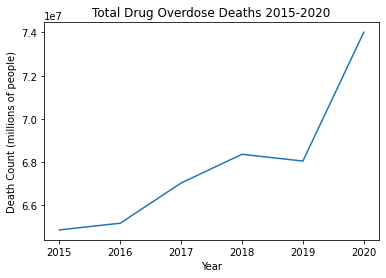

In [11]:
#plotting the data
num_deaths_df.groupby('Year')['Data_Value'].sum().plot(title='Total Drug Overdose Deaths 2015-2020', ylabel = 'Death Count (millions of people)')
plt.show()

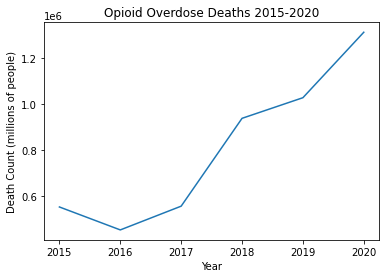

In [12]:
opioid_df.groupby('Year')['Data_Value'].sum().plot(title='Opioid Overdose Deaths 2015-2020', ylabel = 'Death Count (millions of people)')
plt.show()

In [13]:
#grouping by state and summing total opioid deaths
opioid_df.groupby('State')['Data_Value'].sum().sort_values(ascending=False)

State
US    3249997.0
OH     153343.0
IL      98551.0
MD      90296.0
NY      85084.0
NC      82779.0
NJ      77753.0
CA      75588.0
MA      73361.0
TN      65800.0
VA      56992.0
YC      54604.0
AZ      47102.0
CT      45526.0
KY      39852.0
SC      39632.0
TX      39341.0
WA      38445.0
GA      38137.0
WI      35973.0
WV      35465.0
MO      34526.0
MI      33596.0
IN      30483.0
UT      20702.0
NV      20698.0
CO      19383.0
NM      18637.0
NH      18337.0
OR      17157.0
OK      15821.0
ME      14449.0
RI      13158.0
DE      12796.0
DC      10965.0
IA       7970.0
MS       5802.0
VT       4980.0
KS       3353.0
AK       3152.0
HI       1922.0
WY       1642.0
SD       1325.0
MT        614.0
Name: Data_Value, dtype: float64

In [14]:
opioid_df = opioid_df[opioid_df['State'] != 'US']

In [15]:
opioid_df.groupby('State')['Data_Value'].sum().mean()

36862.604651162794

# Answers
* The total number of deaths has increased over time.
    * This can be seen by the increased in the plot of the deaths graph up until 2021, which is so because the data was taken during this year and does not represent the full years worth of data. Looking at similar data taken from the entire year of 2021 will likely show continued increase.
* The total number of opioid deaths has also increased over time.
    * The same issue with 2021 as with total deaths can be seen here.
* The states with the highest number of opioid deaths were Ohio, Illinois, Maryland, California, and New York. The states with the lowest number were Montana, South Dakota, Wyoming, Hawaii and Alaska. 
    * These states make sense because large more populous states have more deaths and smaller less populous states have less deaths, with some exceptions.

## Interpretation and Observations
* Our group is looking closesly at Connecticut since there is lots of data for it, and I think that seeing that Connecticut is in the top half of Opioid deaths, but not at the top shows another reason why it is a good state to look at. It is fairly representative of an average state. 
* In the future, I would like to group my data by regions by mapping the states to regions and seeing if there were any patterns. I wanted to do this by state already, but it is difficult to look at a distribution of 50+ values. 
* Another question that arose for me is what percentage of drug overdose deaths are opioid deaths.

#### Plotting by state

In [16]:
# load US state map
us_map_gdf = gpd.read_file('../data/us_states.geojson')

In [17]:
us_map_gdf.head()

,id,name,density,geometry
0,01,Alabama,94.650,"POLYGON ((-87.359 35.001, -85.607 34.985, -85...."
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.602 55.118, -131.569 55.2..."
2,04,Arizona,57.050,"POLYGON ((-109.043 37.000, -109.048 31.332, -1..."
3,05,Arkansas,56.430,"POLYGON ((-94.474 36.502, -90.153 36.496, -90...."
4,06,California,241.700,"POLYGON ((-123.233 42.006, -122.379 42.012, -1..."


In [18]:
sname2abbr = {'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY'}

In [19]:
# add a state abbrev to the map data frame
us_map_gdf['state']=us_map_gdf['name'].map(sname2abbr)

In [20]:
us_map_gdf

,id,name,density,geometry,state
0,01,Alabama,94.650,"POLYGON ((-87.359 35.001, -85.607 34.985, -85....",AL
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.602 55.118, -131.569 55.2...",AK
2,04,Arizona,57.050,"POLYGON ((-109.043 37.000, -109.048 31.332, -1...",AZ
3,05,Arkansas,56.430,"POLYGON ((-94.474 36.502, -90.153 36.496, -90....",AR
4,06,California,241.700,"POLYGON ((-123.233 42.006, -122.379 42.012, -1...",CA
5,08,Colorado,49.330,"POLYGON ((-107.920 41.004, -105.729 40.998, -1...",CO
6,09,Connecticut,739.100,"POLYGON ((-73.054 42.039, -71.799 42.023, -71....",CT
7,10,Delaware,464.300,"POLYGON ((-75.414 39.804, -75.507 39.684, -75....",DE
8,11,District of Columbia,10065.000,"POLYGON ((-77.035 38.994, -76.909 38.895, -77....",DC
9,12,Florida,353.400,"POLYGON ((-85.497 30.998, -85.004 31.003, -84....",FL


In [21]:
# calculate total deaths by state (all years)
deaths_by_state = opioid_df.groupby('State')['Data_Value'].sum()

# merge in the state data
us_opioid_deaths_gdf= us_map_gdf.merge(deaths_by_state,
                                       left_on='state',
                                       right_on='State')

<AxesSubplot:>

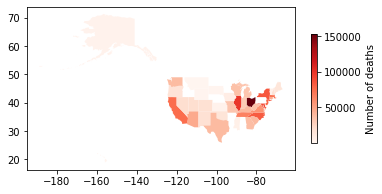

In [22]:
us_opioid_deaths_gdf.plot(column='Data_Value',
                          cmap='Reds', legend=True,
                          legend_kwds={'shrink': 0.5,
                                     'label': 'Number of deaths'
                                    }
                         )

<div class="alert alert-info">


### Questions

* Only 44 states in opioid deaths data frame?
    
    
</div>

In [23]:
# result from groupby State
deaths_by_state.shape

(43,)

In [24]:
opioid_df['State'].unique()

array(['AK', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'HI', 'IA', 'IL',
       'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'YC'],
      dtype=object)

In [25]:
opioid_df['State'].nunique()

43

* Actually looks like it is only 43 states as there is a `US`

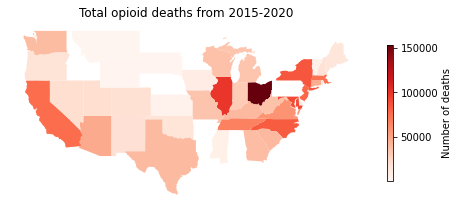

In [28]:
# drop Alaska and Hawaii 
us_main_gdf=us_opioid_deaths_gdf.set_index('state').drop(['AK', 'HI'])

us_main_gdf.plot(column='Data_Value',
                          cmap='Reds', legend=True,
                          legend_kwds={'shrink': 0.5,
                                     'label': 'Number of deaths'
                                    },
                 
                          figsize=(8,5)
                         )
plt.axis('off')
plt.title('Total opioid deaths from 2015-2020')
plt.show()

In [27]:
opioid_df['Year'].agg(['min','max'])

min    2015
max    2020
Name: Year, dtype: int64